## Hovmoller of Tasselled Cap Wetness, Brightness, Greenness, Rainfall for Multiple Sites

__What does this notebook do?__ This notebook opens a shape file of transects and plot a hovmollers diagram of the sites tasselled cap indices based on datacube landsat surface reflectance data with contextual BoM rainfall data. You can then plot hovmoller diagrams for the thresholded tasselled cap indices.


__Before you run this notebook:__

__you will need:__

  * a shapefile of the site transects in EPSG 4326 in a known location on raijin
  * to use the rainfall data you will need to request access to project r78 on the NCI
  
__Background:__  

The *Tasseled Cap Index (TCI)* is a method of reducing 6 bands of satellite data (BLUE, GREEN, RED, NIR, SWIR1, SWIR2) to 3 bands (Brightness, Greenness, Wetness) using a Principal Components Analysis and Procrustes' Rotation [(Roberts et al 2018)](##References). This notebook uses the published coefficients of [Crist 1985](##References) as applied to Digital Earth Australia's Landsat satellite data.

*Tasseled cap percentage exceedance:* Percent of observations within epoch where TCI is above chosen threshold (i.e. where pixel has been 'wet' 'green or 'bright'). e default thresholds used in calculating the percentage exceedance are brightness: 4000, greenness 600, wetness -600. 

__Date:__ June 2018

__Authors:__ Bex Dunn, Leo Lymburner
Bex Dunn June 2018

### Set up modules, functions and libraries

In [1]:
#in this notebook we want to plot non-interactively
%matplotlib inline

#suppress warnings thrown when rainfall data is imported
# import logging
# logging.getLogger('rasterio._gdal').setLevel(logging.ERROR)
# import warnings

#get standard libraries
import datetime as dt
import fiona
import geopandas as gpd
import shapely.geometry
from shapely.geometry import shape
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from matplotlib import colors
from matplotlib import pyplot as plt
import matplotlib.dates
import numpy as np
import os
import pickle
import rasterio
import rasterio.features
import sys
import xarray as xr

#modules for datacube
import datacube
from datacube.utils import geometry
from datacube.storage.storage import write_dataset_to_netcdf
from datacube.helpers import write_geotiff

# Import external functions from dea-notebooks
sys.path.append(os.path.expanduser('~/dea-notebooks/Scripts/'))
import DEAPlotting, DEADataHandling
from BandIndices import tasseled_cap
import TasseledCapTools
from FileDialogs import *

#ignore datacube warnings (needs to be last import statement)
import warnings
warnings.filterwarnings('ignore', module='datacube')

#alias for datacube
dc = datacube.Datacube(app='dc-BoMrainfallandNbart')

### Set up functions for this notebook

In [2]:
#This defines the function that converts a linear vector file into a string of x,y coordinates
def geom_query(geom, geom_crs='EPSG:4326'):
    """
    Create datacube query snippet for geometry
    """
    return {
        'x': (geom.bounds[0], geom.bounds[2]),
        'y': (geom.bounds[1], geom.bounds[3]),
        'crs': geom_crs
    }

def warp_geometry(geom, crs_crs, dst_crs):
    """
    warp geometry from crs_crs to dst_crs
    """
    return shapely.geometry.shape(rasterio.warp.transform_geom(crs_crs, dst_crs, shapely.geometry.mapping(geom)))


def transect(data, geom, resolution, method='nearest', tolerance=None):
    """
    gets the transect
    """
    #Changed for py3 compatibility 17.03.17
    dist = [i for i in range(0, int(geom.length), resolution)]
    #points = zip(*[geom.interpolate(d).coords[0] for d in dist]) py2
    points = list(zip(*[geom.interpolate(d).coords[0] for d in dist])) #py3
    indexers = {
        data.crs.dimensions[0]: list(points[1]),
        data.crs.dimensions[1]: list(points[0])        
    }
    return data.sel_points(xr.DataArray(dist, name='distance', dims=['distance']),
                           method=method,
                           tolerance=tolerance,
                           **indexers)
def load_rainfall(query):
    
    dc_rf =datacube.Datacube(config='/g/data/r78/bom_grids/rainfall.conf')
    
    rf_data = dc_rf.load(product = 'rainfall_grids_1901_2017',**query)

    return rf_data

## add the path to the input shapefile

In [3]:
#transects file will be the file containing our transects
transects_file = '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_shapefiles/transects/merged2_hovmoller_transects2.shp'
transects_df = gpd.read_file(transects_file)

## Define the epoch

In [4]:
#Define temporal range
start_of_epoch = '1987-10-01' 
end_of_epoch =  '2017-10-01'
print ('temporal range is '+start_of_epoch+' to '+end_of_epoch)

temporal range is 1987-10-01 to 2017-10-01


### Retrieve data, plot hovmollers and save to file (this may take some time)

line is not simple, simplifying
BasaltR_AmeliaDowns
BasaltR_AmeliaDowns_ix0
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_AmeliaDowns_ix0_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_AmeliaDowns_ix0_/hov_data_BasaltR_AmeliaDowns_ix0_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:74: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:75: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


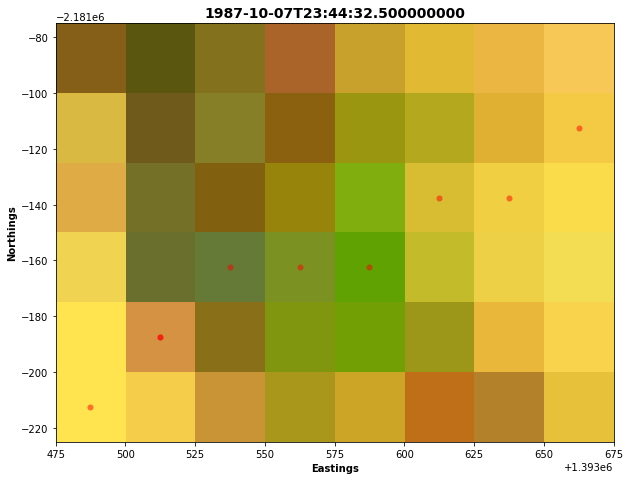

transect tci image: 


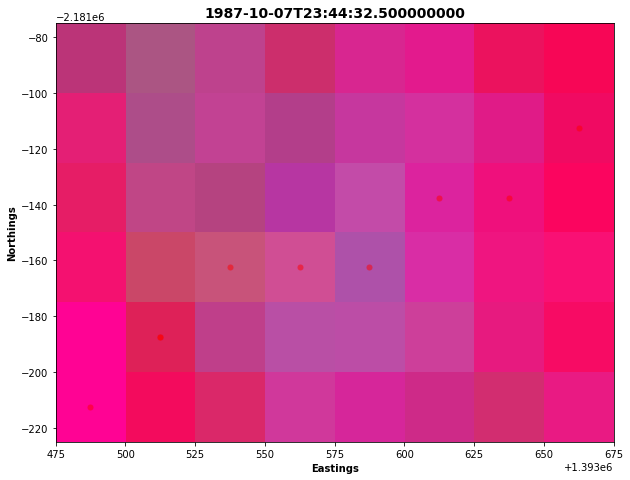

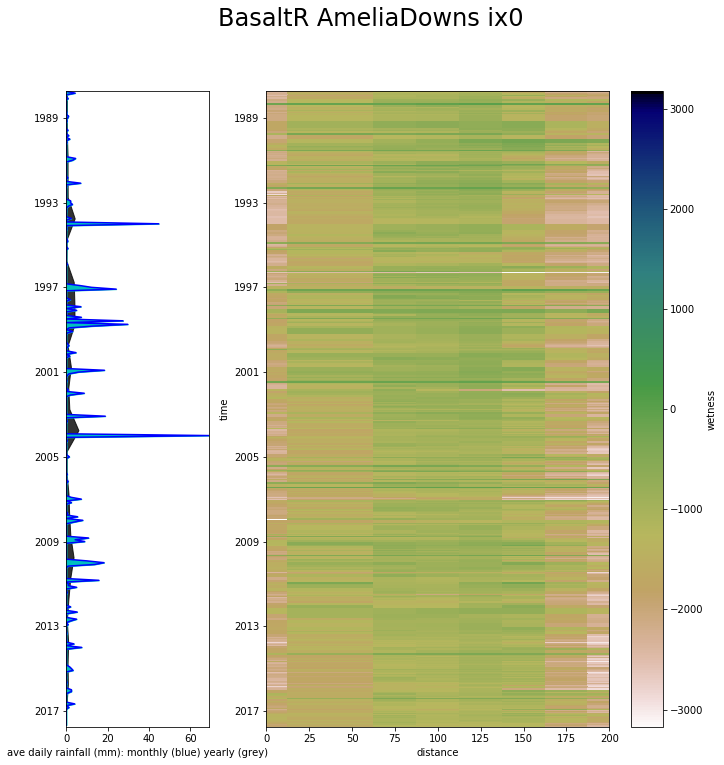

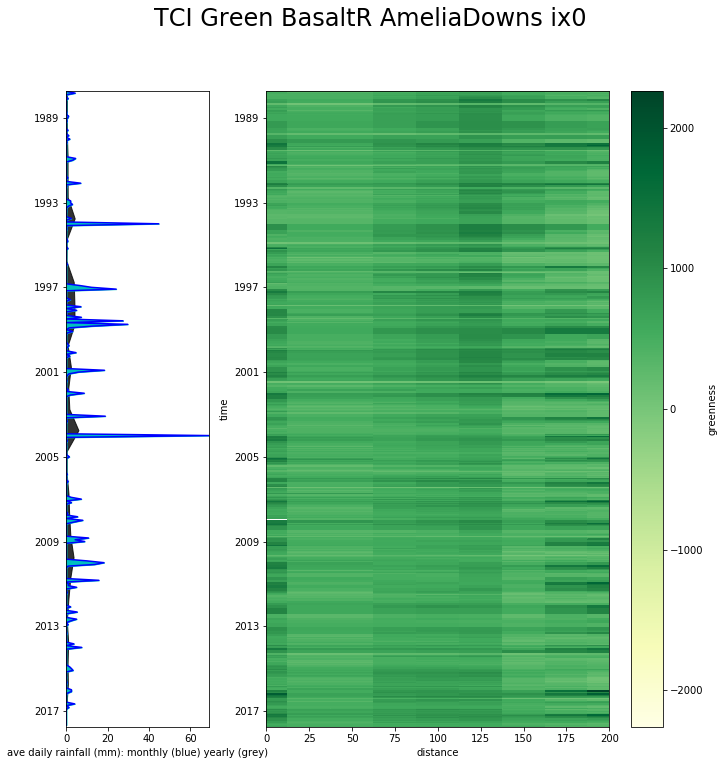

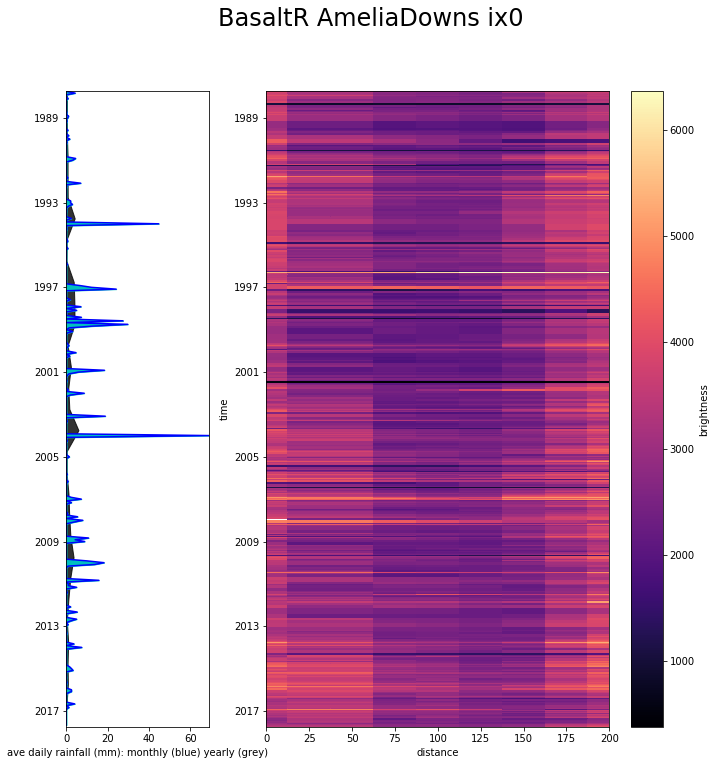

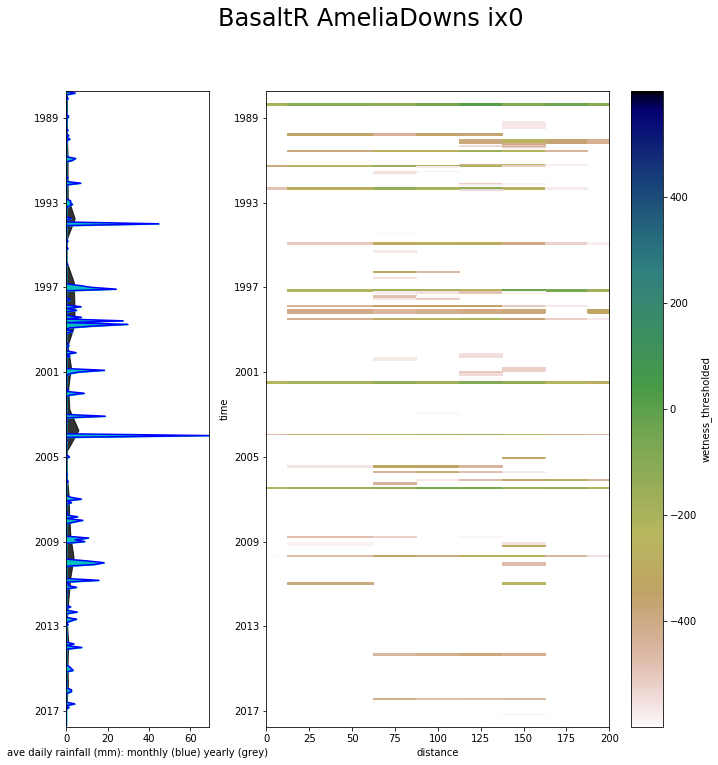

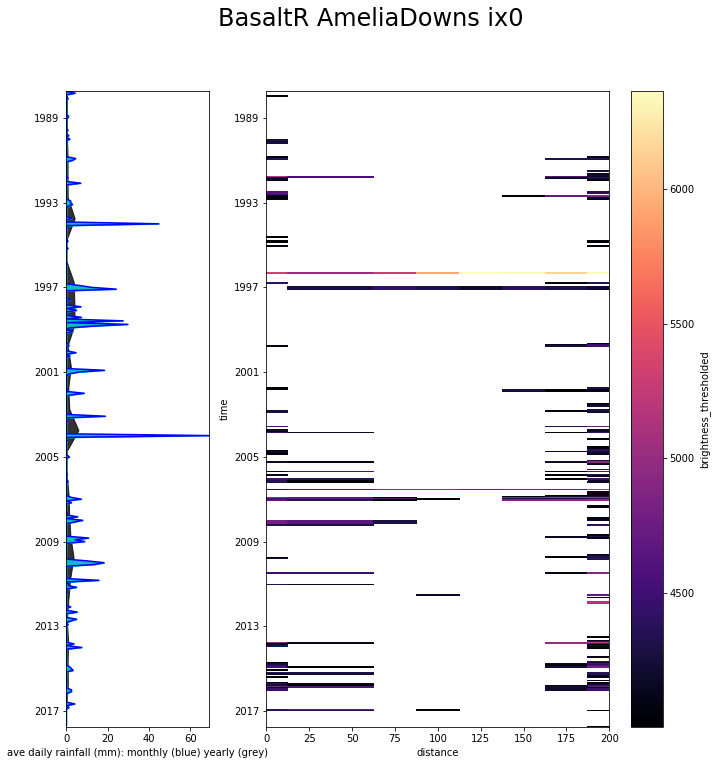

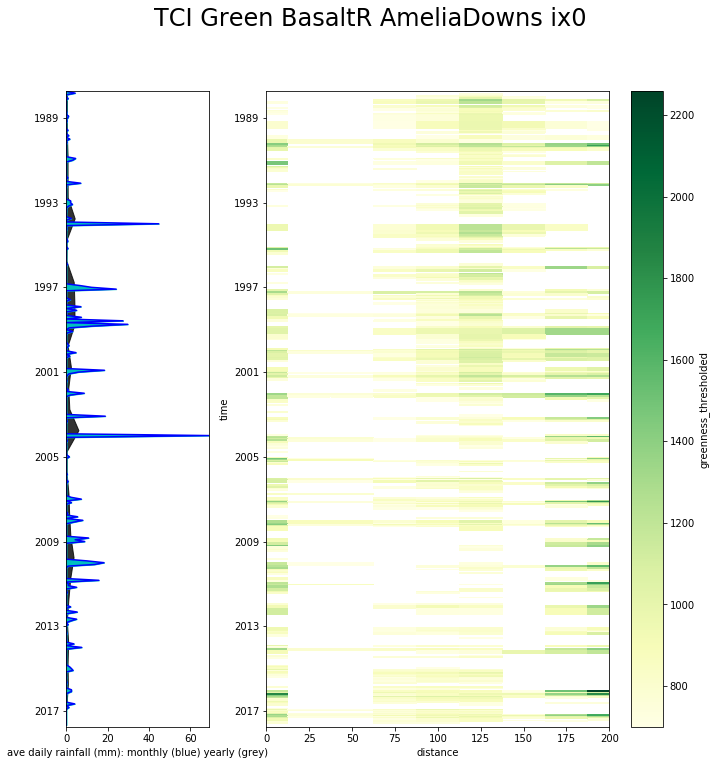

saved data to file
line is not simple, simplifying
Basalt R Bluff Downs
Basalt_R_Bluff_Downs_ix1
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Basalt_R_Bluff_Downs_ix1_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Basalt_R_Bluff_Downs_ix1_/hov_data_Basalt_R_Bluff_Downs_ix1_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:74: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:75: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


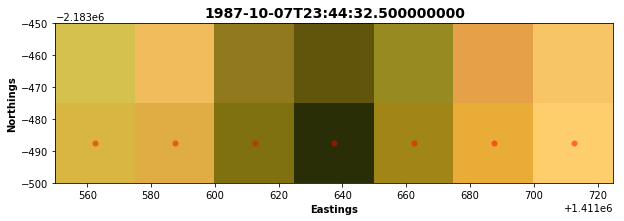

transect tci image: 


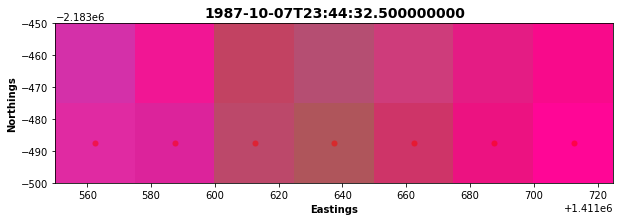

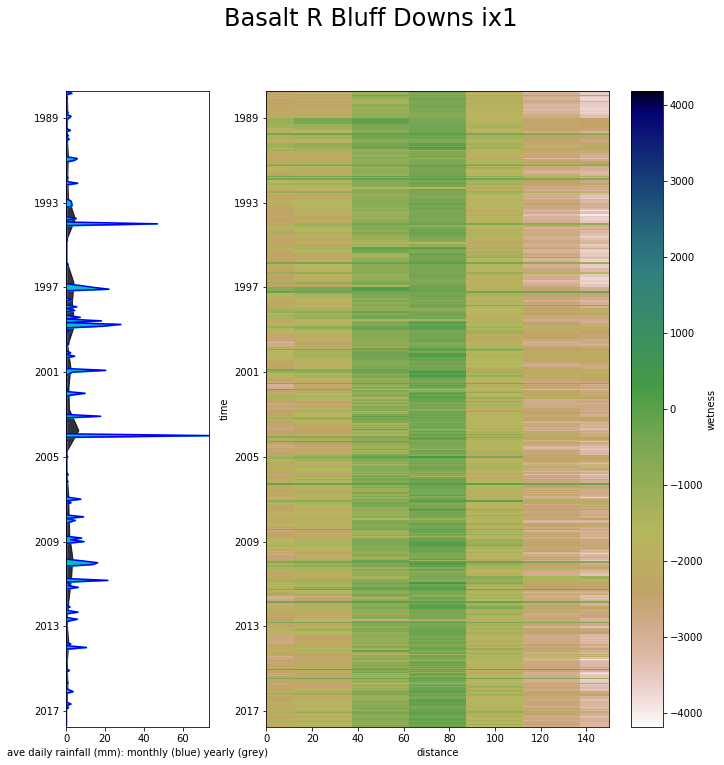

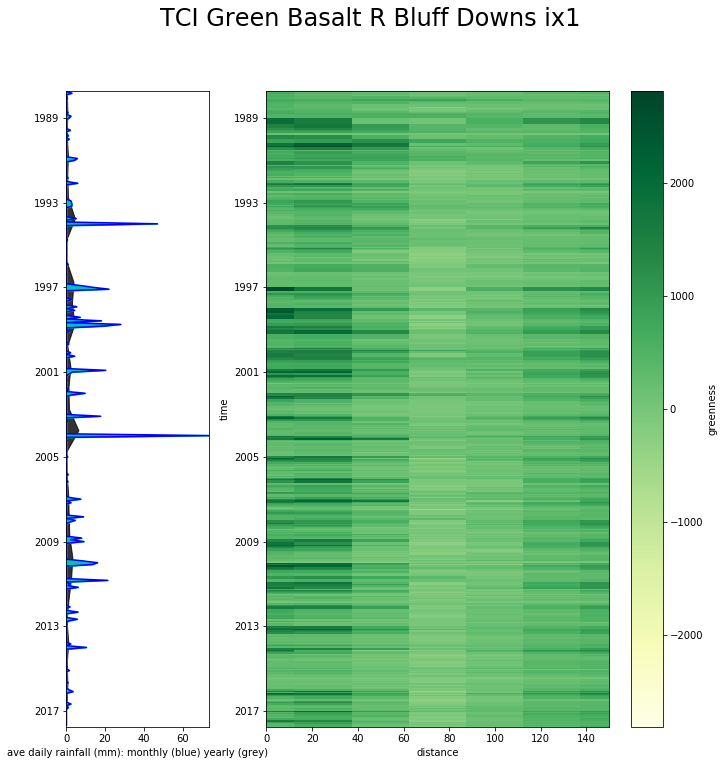

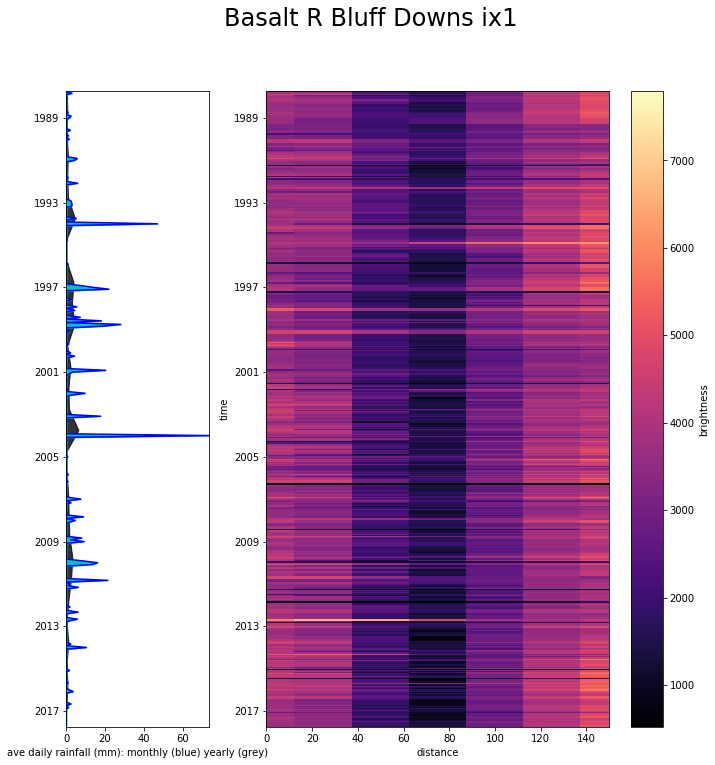

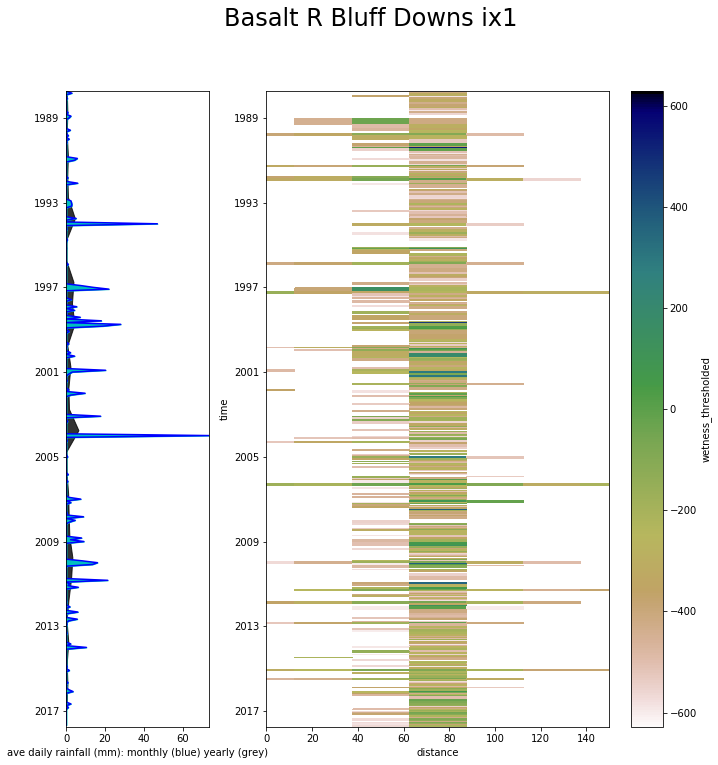

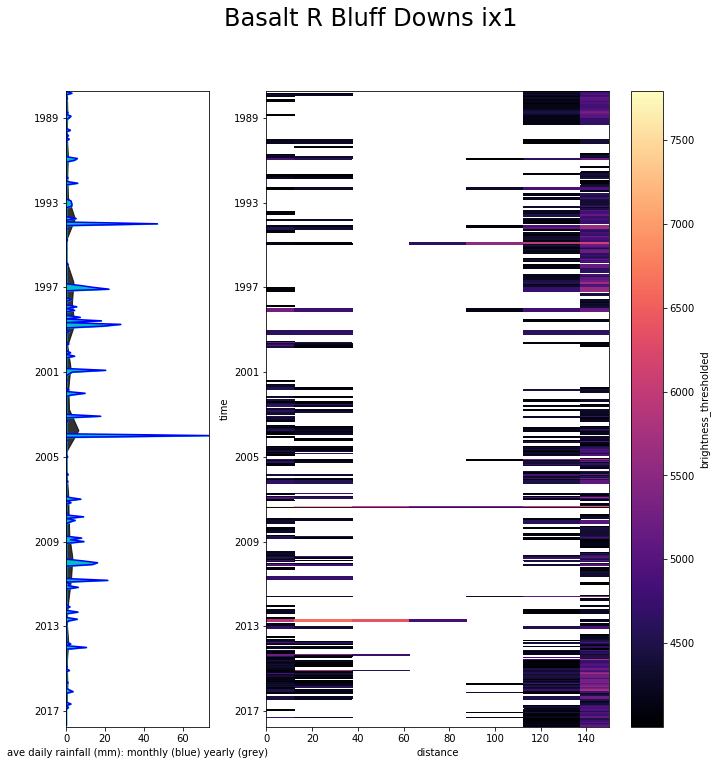

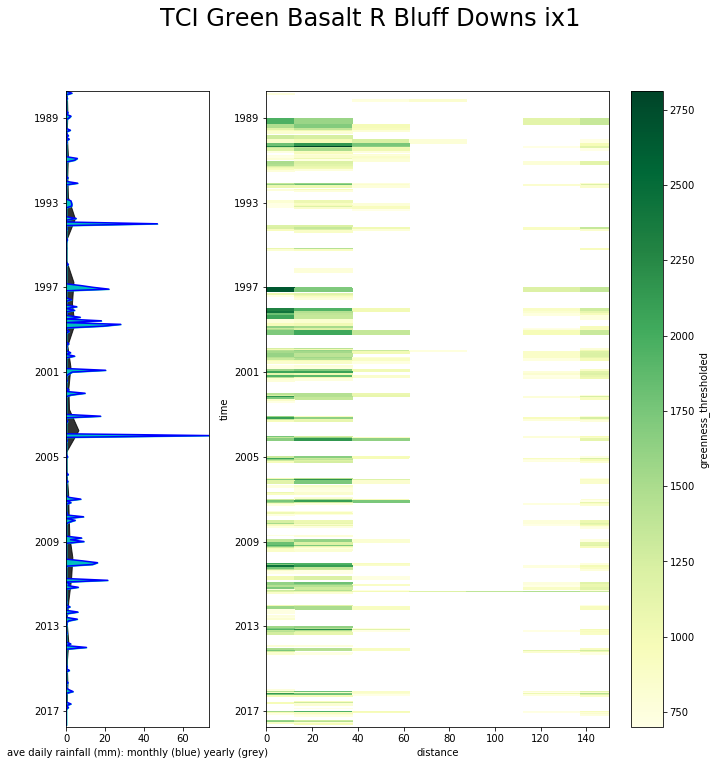

saved data to file
line is not simple, simplifying
BasaltR_Cargoon
BasaltR_Cargoon_ix2
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_Cargoon_ix2_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_Cargoon_ix2_/hov_data_BasaltR_Cargoon_ix2_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:74: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:75: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


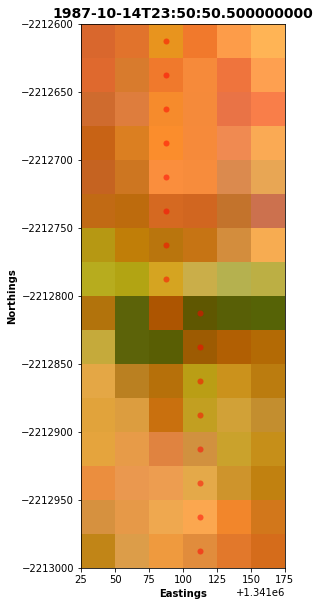

transect tci image: 


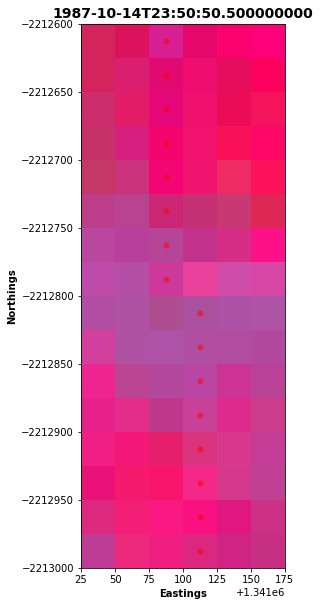

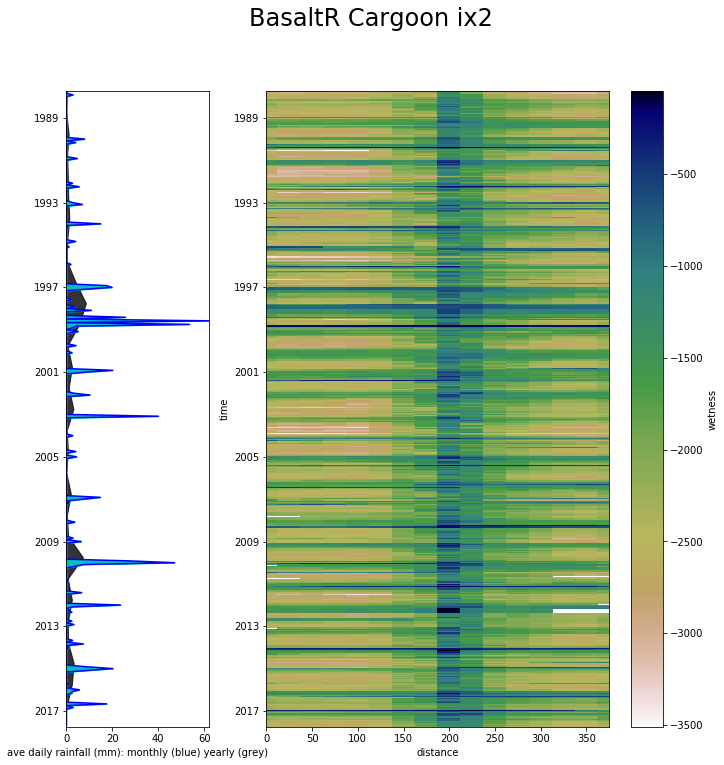

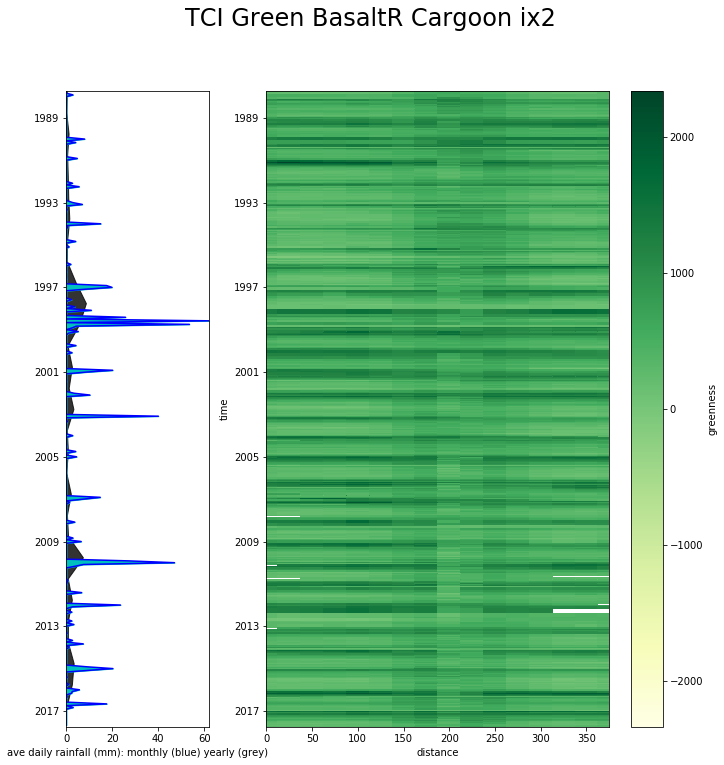

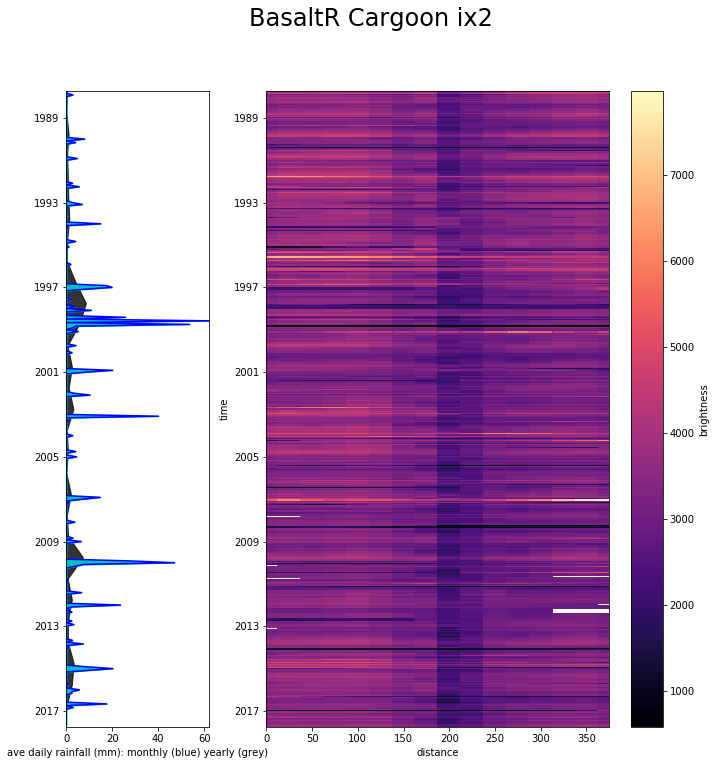

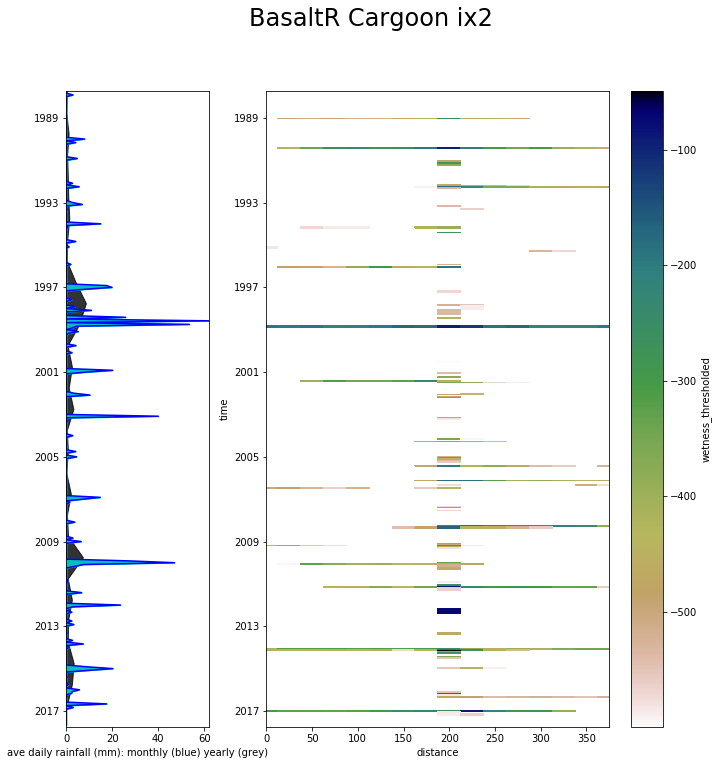

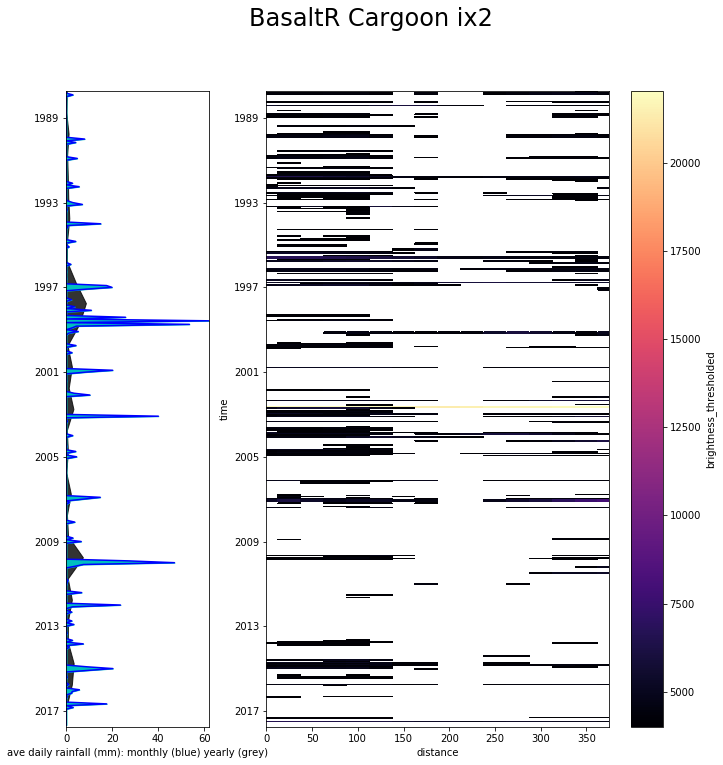

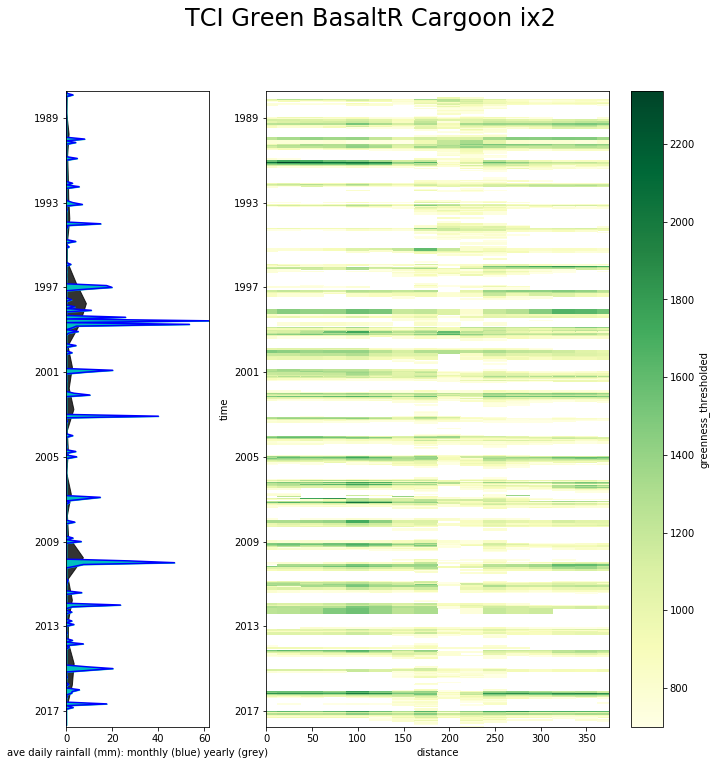

saved data to file
line is not simple, simplifying
BasaltR_Ellenvale
BasaltR_Ellenvale_ix3
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_Ellenvale_ix3_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_Ellenvale_ix3_/hov_data_BasaltR_Ellenvale_ix3_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:74: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:75: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


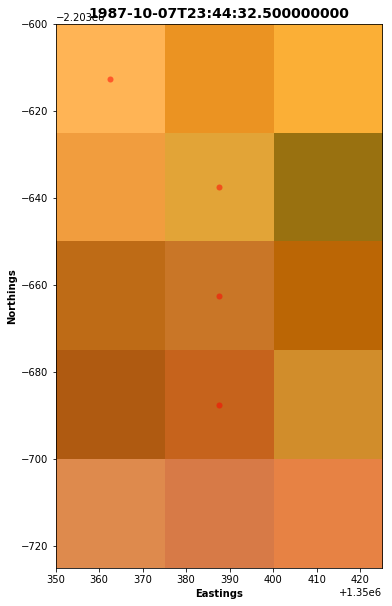

transect tci image: 


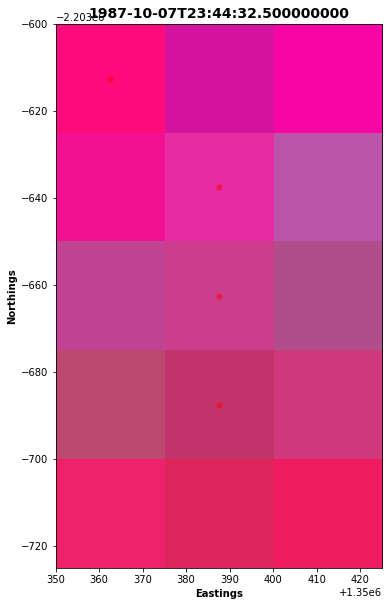

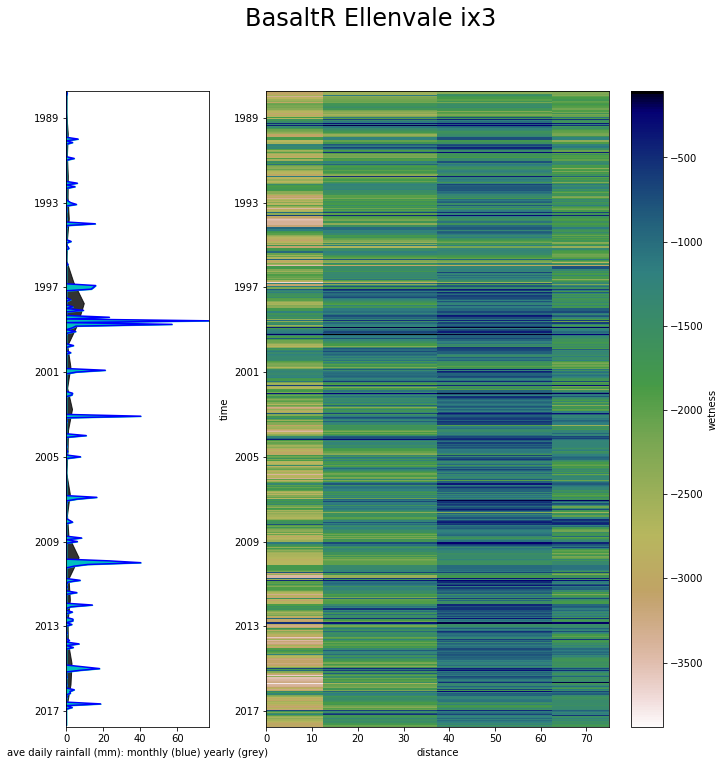

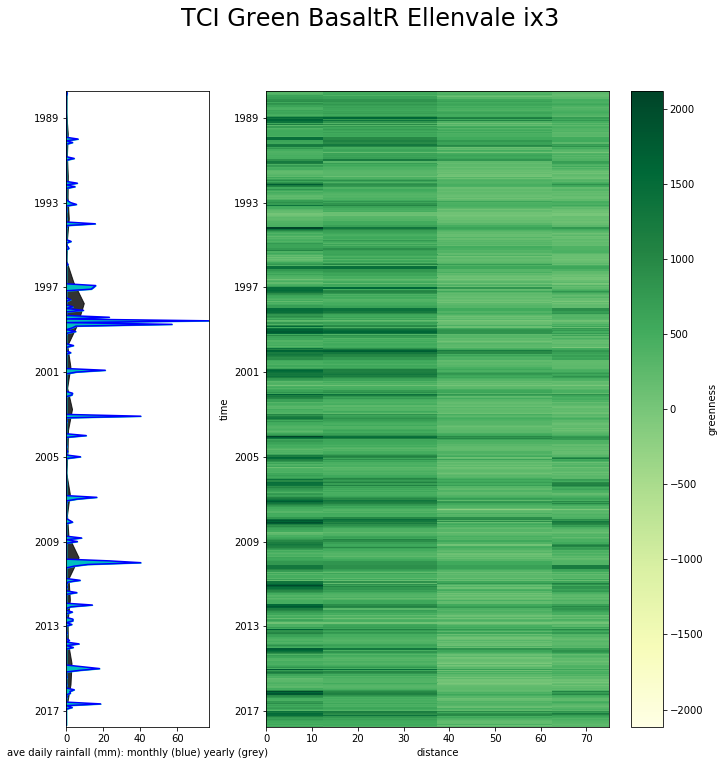

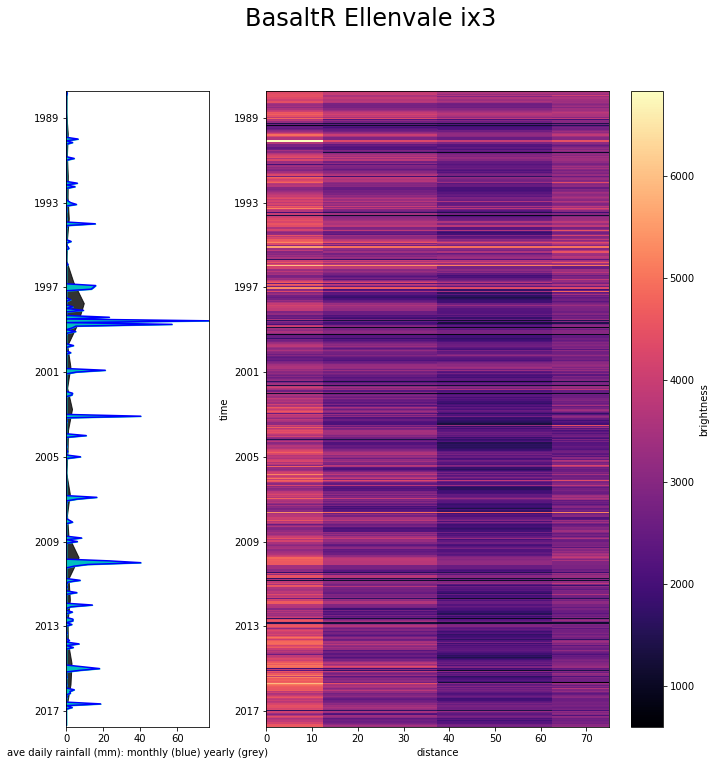

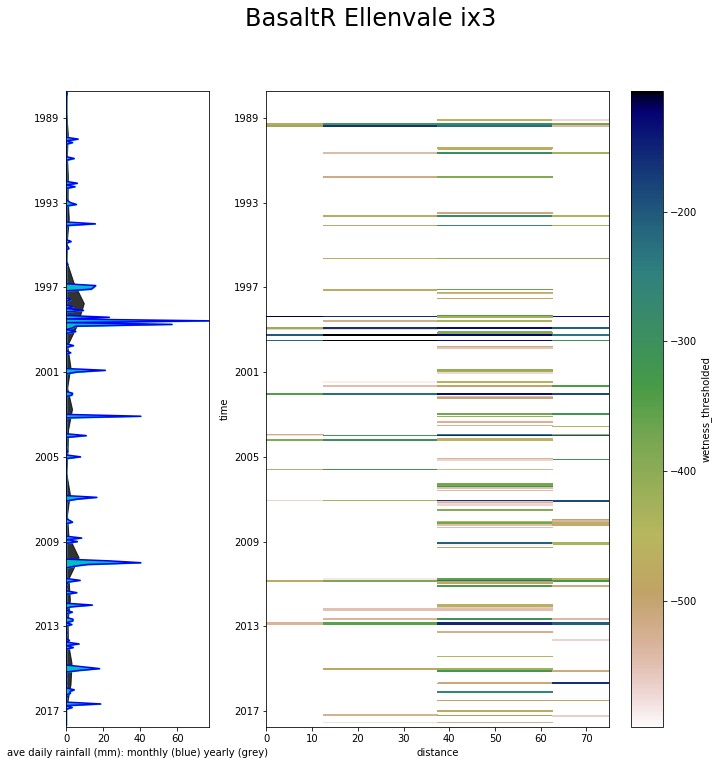

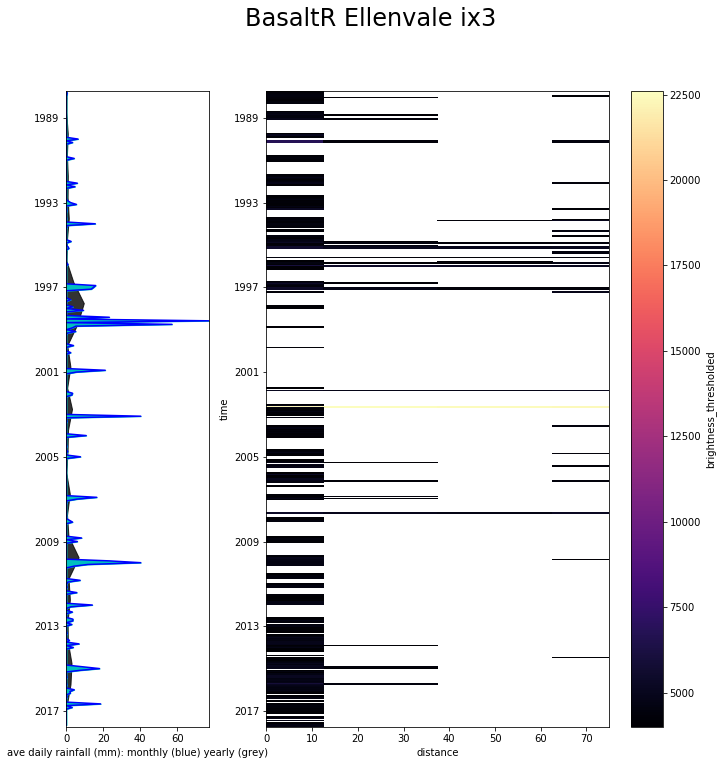

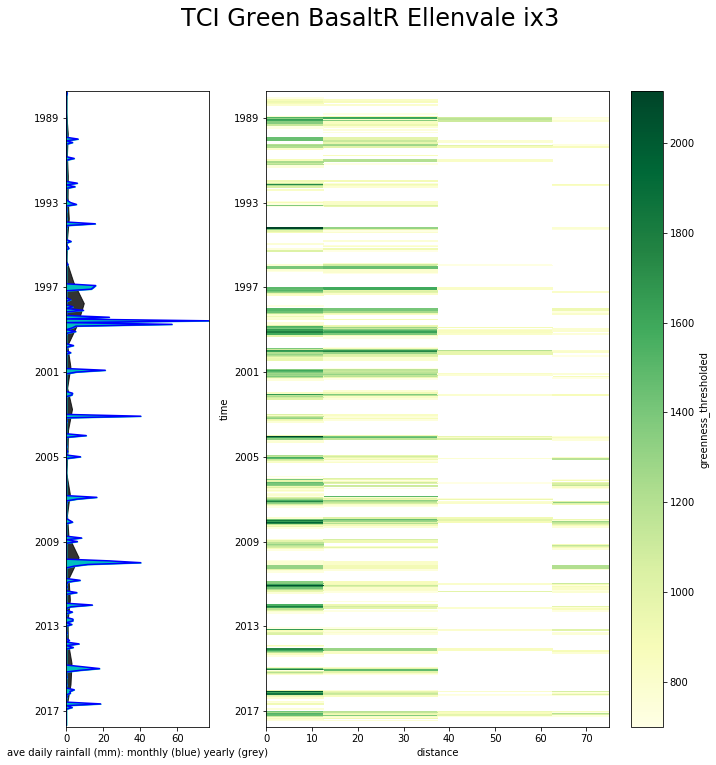

saved data to file
line is not simple, simplifying
BasaltR_JackoCk
BasaltR_JackoCk_ix4
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_JackoCk_ix4_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_JackoCk_ix4_/hov_data_BasaltR_JackoCk_ix4_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:74: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:75: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


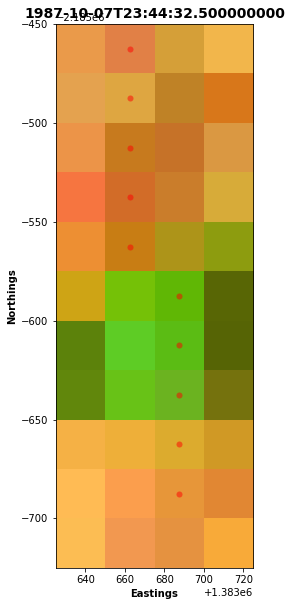

transect tci image: 


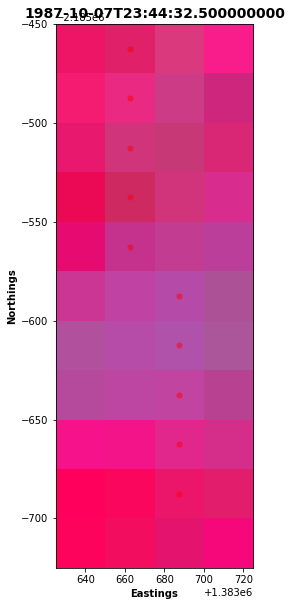

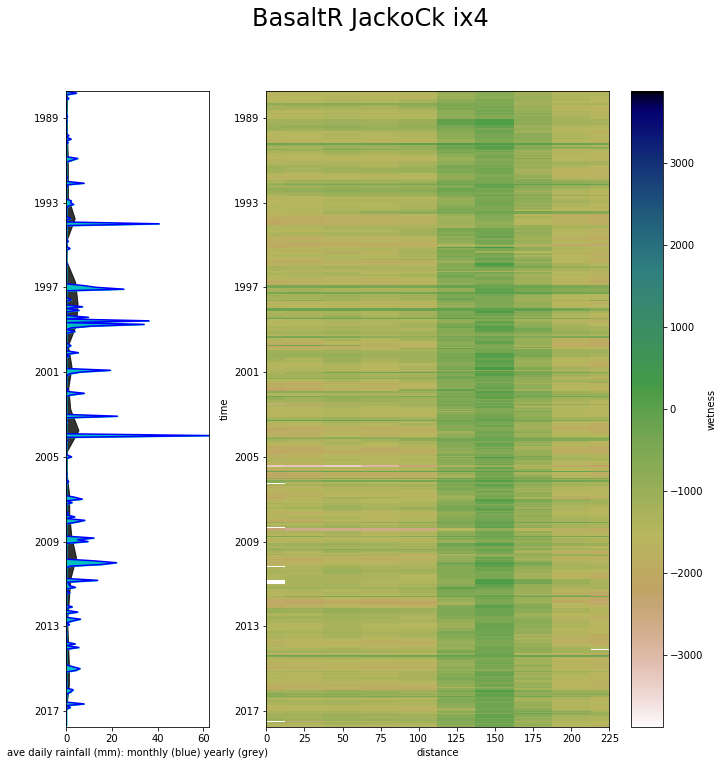

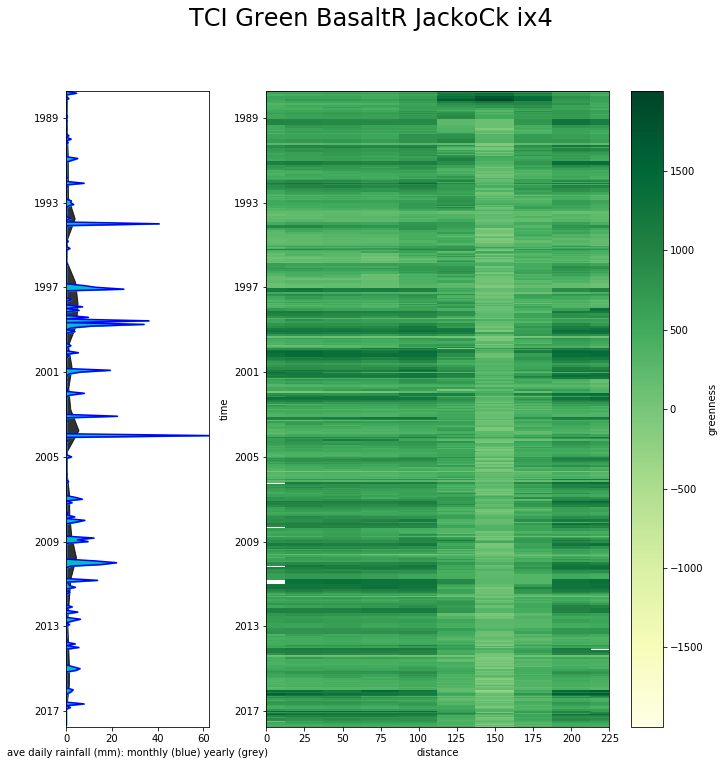

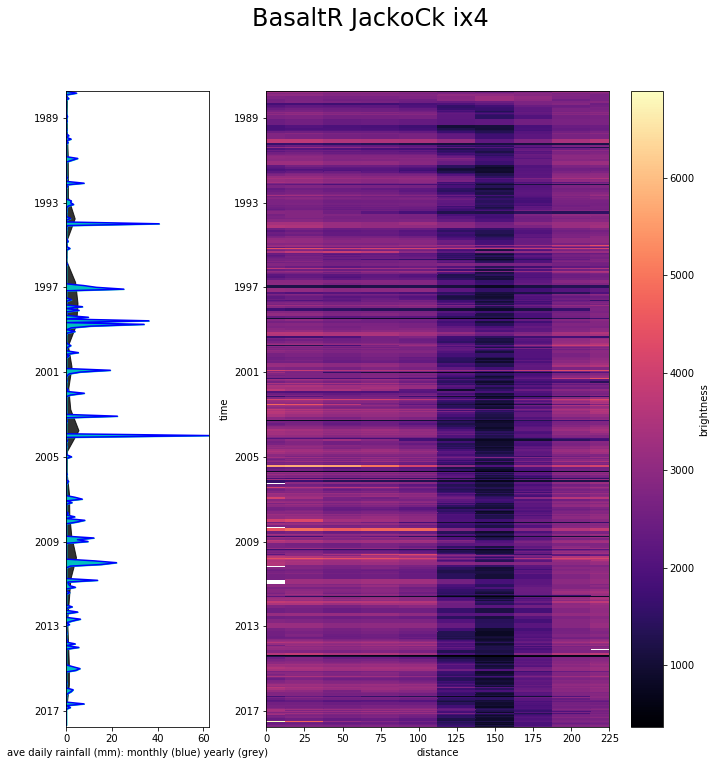

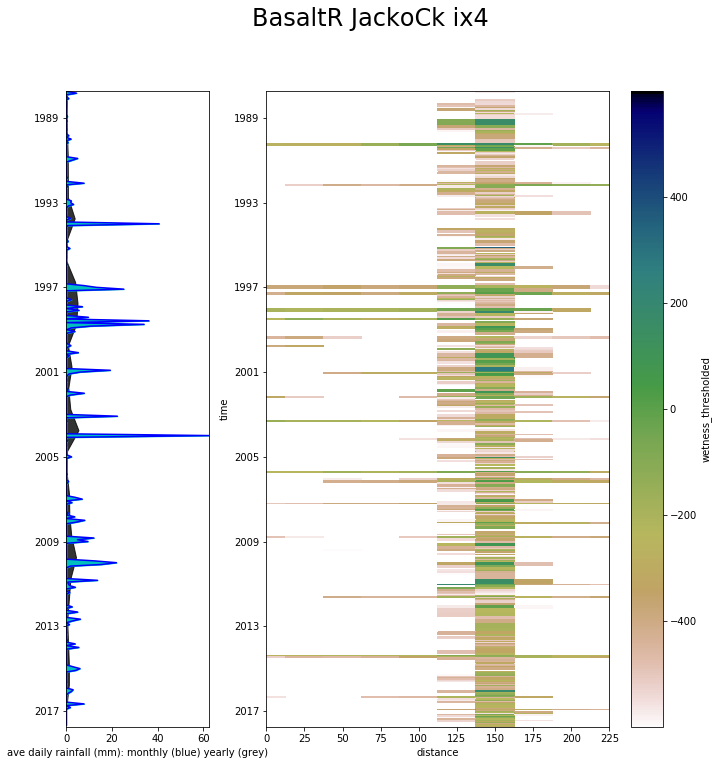

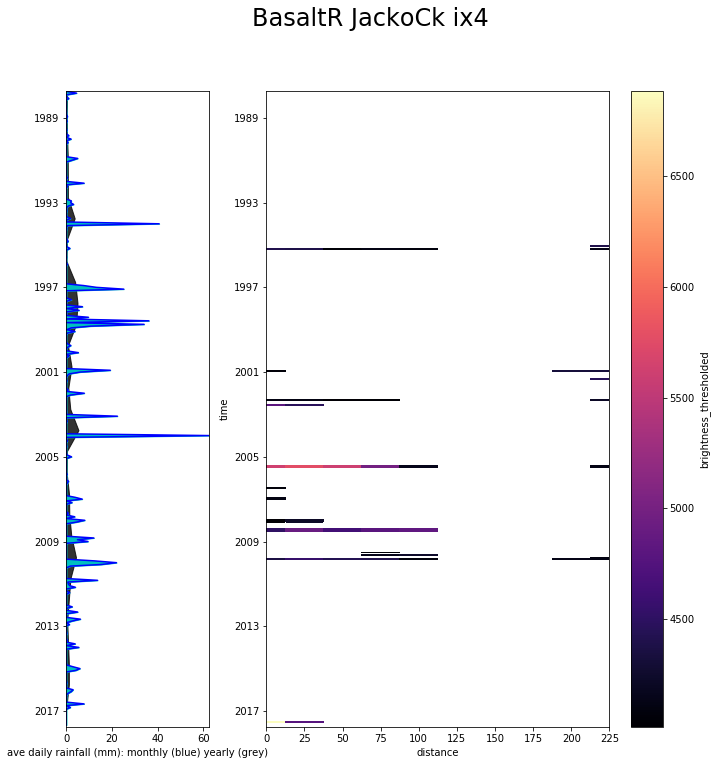

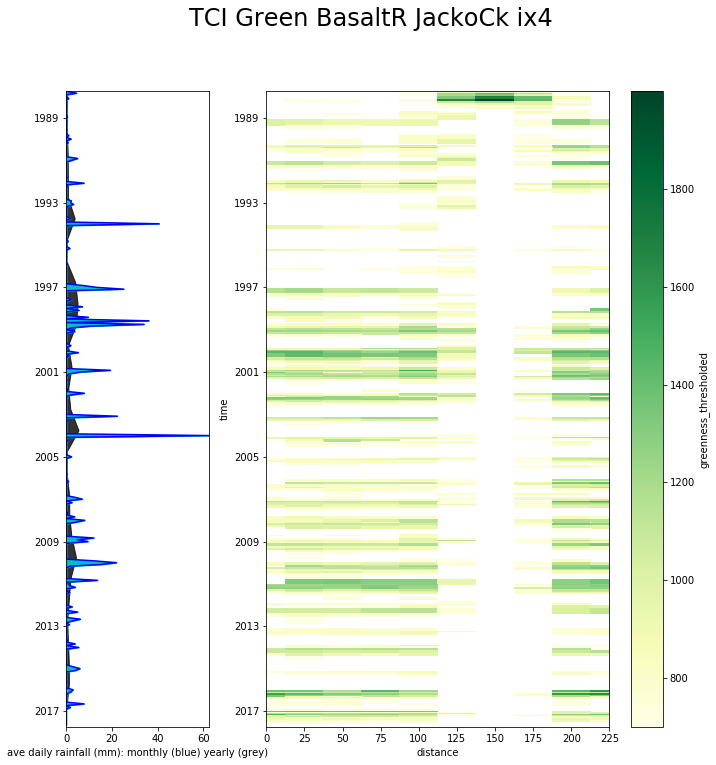

saved data to file
line is not simple, simplifying
BasaltR_junction
BasaltR_junction_ix5
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_junction_ix5_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/BasaltR_junction_ix5_/hov_data_BasaltR_junction_ix5_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:74: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:75: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


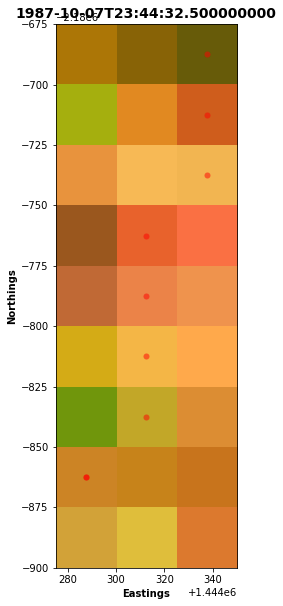

transect tci image: 


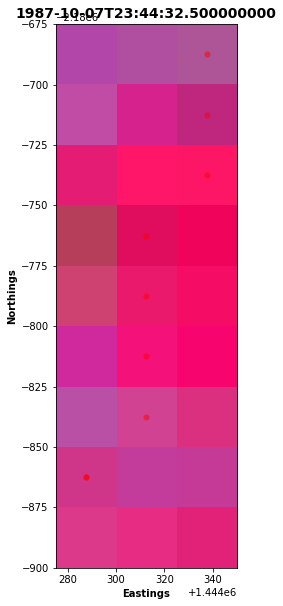

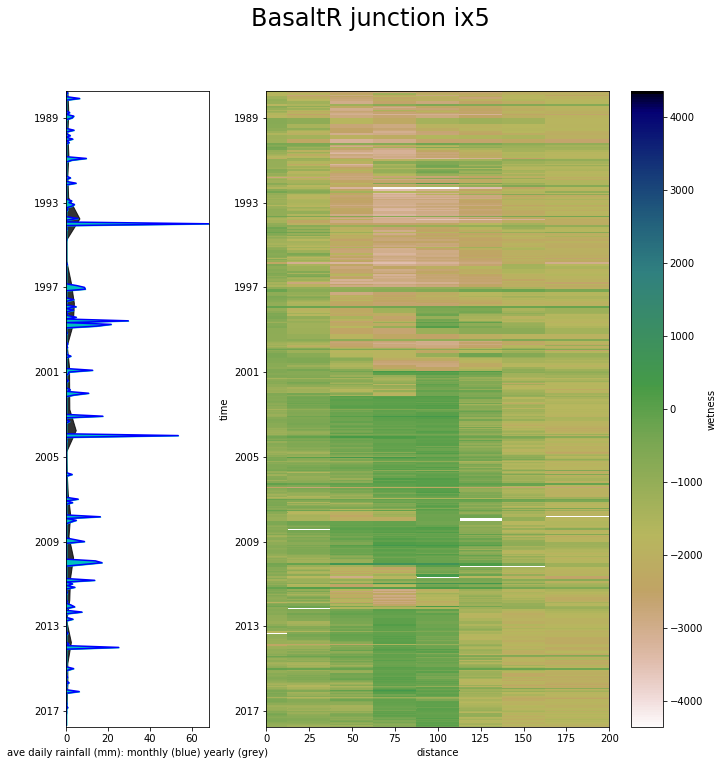

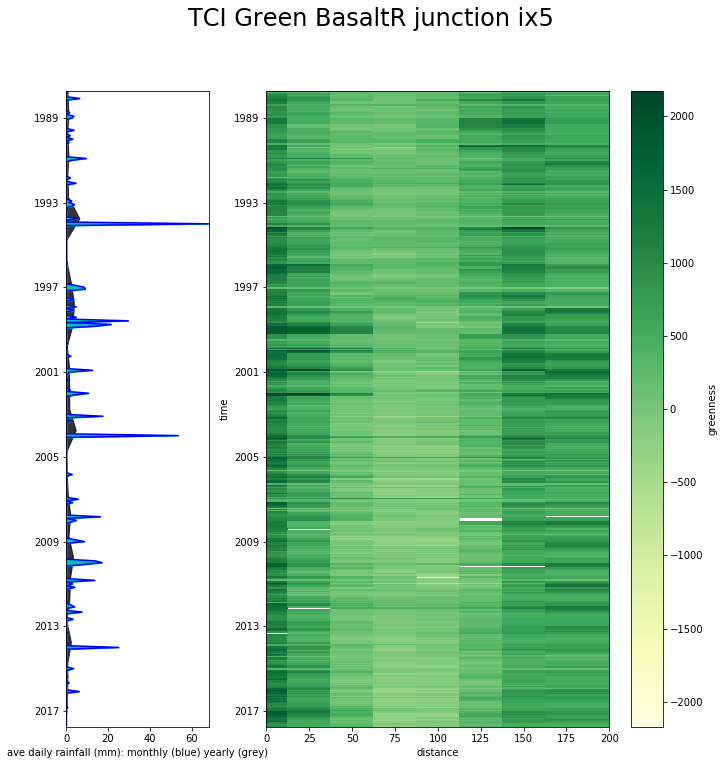

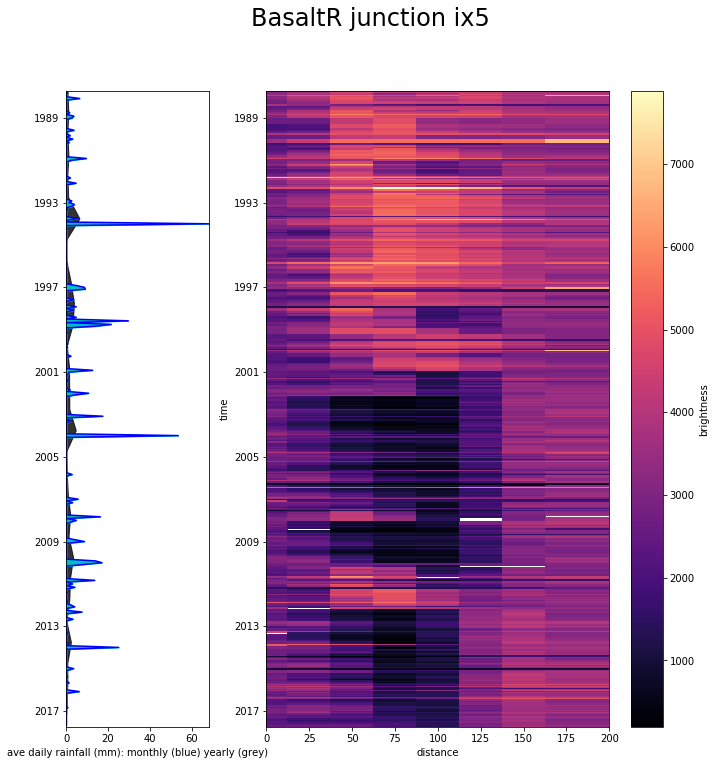

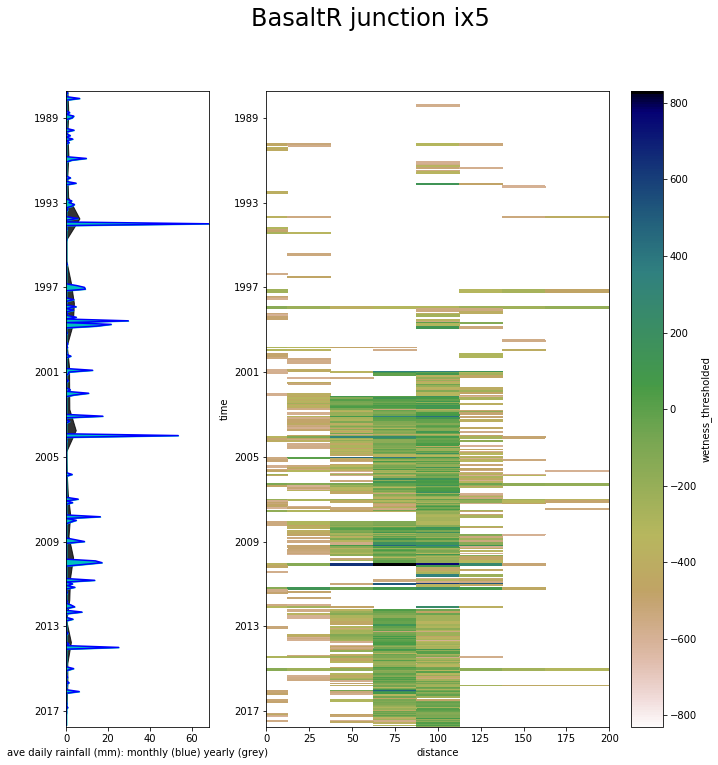

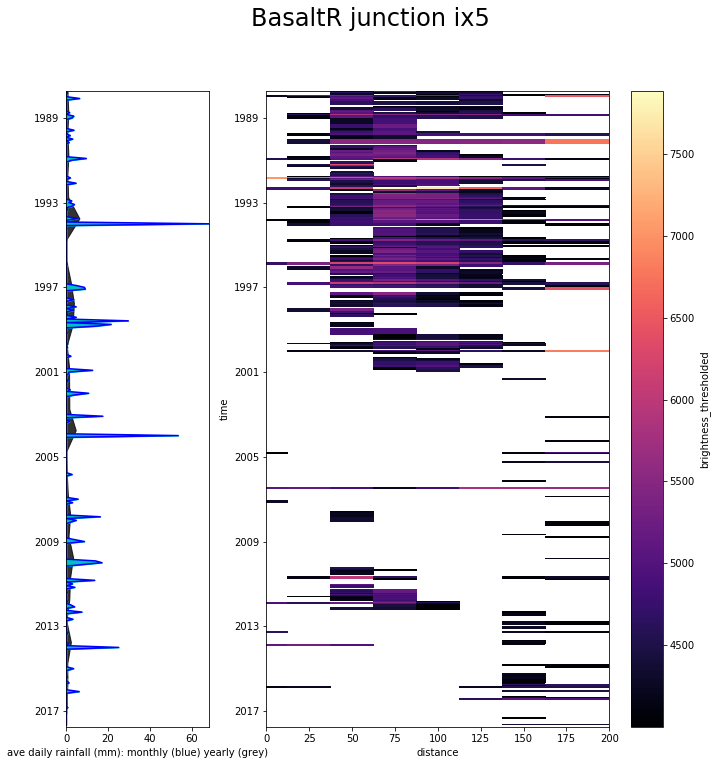

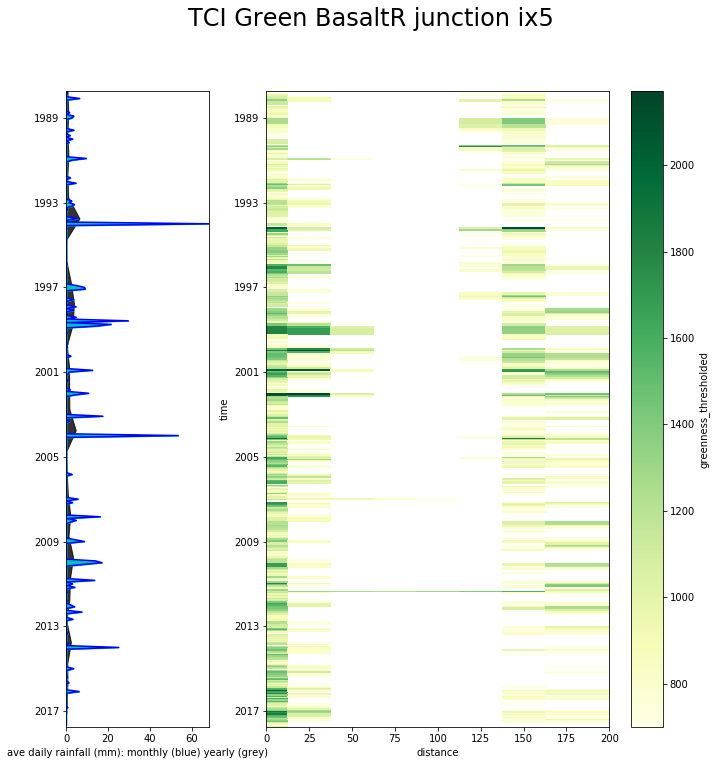

saved data to file
line is not simple, simplifying
Bull paddock
Bull_paddock_ix6
OS error: [Errno 17] File exists: '/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Bull_paddock_ix6_/'
/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/Bull_paddock_ix6_/hov_data_Bull_paddock_ix6_1987-10-01_2017-10-01.pkl
loaded data from file


/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:74: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="MS").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:75: DeprecationWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and 'how="mean", instead consider using .resample(time="AS-OCT").mean() 
/g/data/v10/public/modules/dea-env/20180405/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: Dataset.sel_points is deprecated: use Dataset.sel()instead.


transect image: 


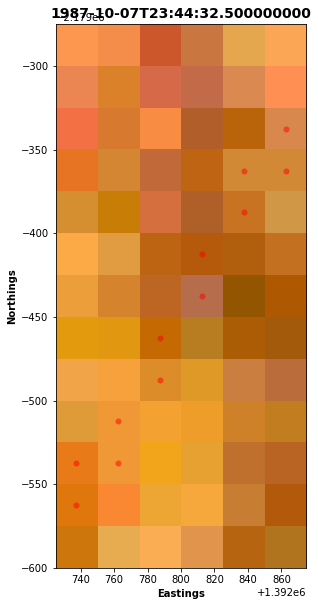

transect tci image: 


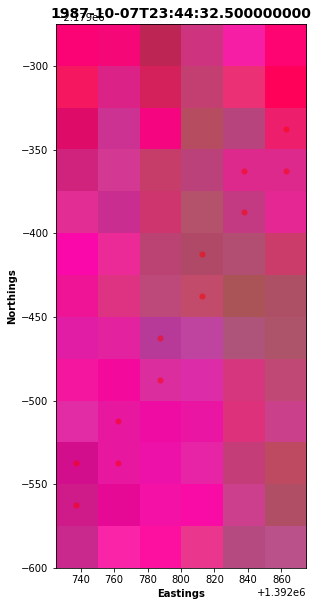

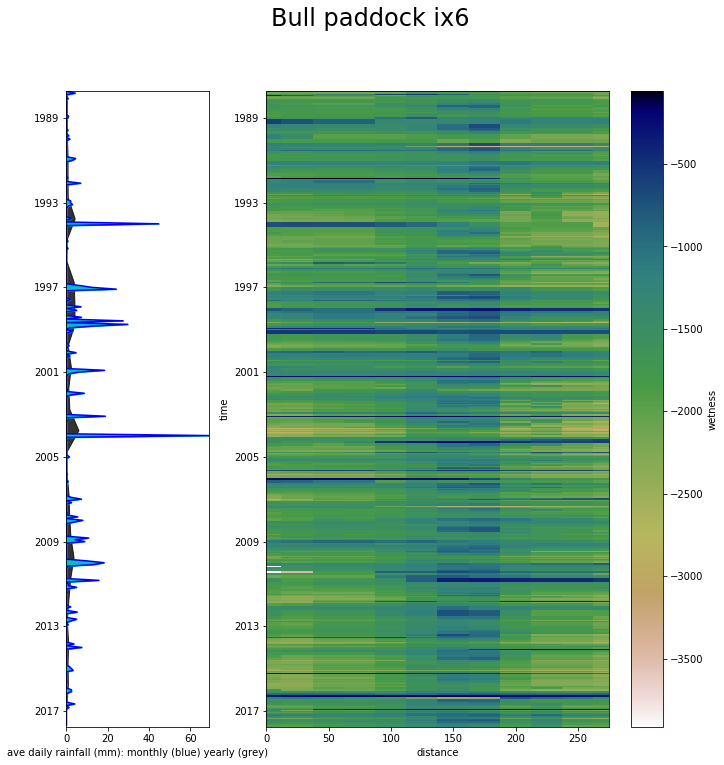

In [ ]:
#use fiona module to open the shape file
transects = fiona.open(transects_file)

# #this statement asks you to choose a shapefile. put in a number and press enter.
# i = int(input("choose the index of the transect you would like to plot:"))
for i in range(len(transects)):

    geom1 = shape(transects[i]['geometry'])
    #if the geometry is not unique, make it unique!
    if not geom1.is_simple:
        #test to see if our linestring is a simple line --- some of these lines
        #went back on themselves
        print('line is not simple, simplifying')
        geom1 = geom1.intersection(geom1)
    geom_query1 = geom_query(geom1)
    query = {
        'time': (start_of_epoch, end_of_epoch),  
    }
    query.update(geom_query(geom1, geom_crs=transects.crs_wkt)) 

### use the transect dataframe to get transect metadata

    #use the transect dataframe to get transect metadata
    transect_index = transects_df.index[i]
    transect_name = transects_df['Name'][i] 
    try:
        print(transect_name)
    except TypeError as err:
        print("TypeError: {0}".format(err))
        print(transect_name)

    #create a filename for the transect
    shape_name = transect_name.split()
    shape_name ='_'.join(shape_name)
    shape_name=shape_name+'_ix'+str(transect_index)
    print(shape_name)

    #setup a save directory for our data
    savepath ='/g/data/r78/rjd547/groundwater_activities/Burdekin/Burdekin_Results/HovResults/'+shape_name+'_/'
    try:
            os.mkdir(savepath)
    except OSError as err:
            print("OS error: {0}".format(err))

### Check if this notebook has already been run and the data saved:

    print(savepath+'hov_data_{}_{}_{}'.format(shape_name,start_of_epoch,end_of_epoch)+'.pkl')

### If not, pull in rainfall and nbar 

    if os.path.isfile(savepath+'hov_data_{}_{}_{}'.format(shape_name,start_of_epoch,end_of_epoch)+'.pkl'):
        f = open(savepath+'hov_data_{}_{}_{}'.format(shape_name,start_of_epoch,end_of_epoch)+'.pkl', 'rb')
        hov_data = pickle.load(f) 
        f.close()
        if hov_data is not None: 
            print('loaded data from file')
            ds = hov_data['ds']
            Studysite_rain=hov_data['Studysite_rain']

    else:
        print('did not load data from previous run')
        #use our DEADataHandling function to load landsat data for all sensors in epoch and mask out cloudy scenes
        ds = DEADataHandling.load_clearlandsat(dc, query,product='nbart',masked_prop=0.80)
        print('loaded data from DEA')
        #Grab bom_rainfall_grids from the datacube
        Studysite_rain = load_rainfall(query)
        print('loaded bom rainfall grids from DEA')

### resample gridded rainfall data

    #resample xarray Dataset Studysite_rain by Annual'AS' to get yearly avg with year starting in october
    #Note that the resampling we did means that each year is labelled according to its first day  
    rain_sp = Studysite_rain.mean(dim = ('latitude','longitude'))
    month_sp = rain_sp.resample('MS', dim = 'time', how = 'mean')
    year_avg = Studysite_rain.resample('AS-OCT', dim='time', how='mean', keep_attrs=True)
    # Create a spatial average
    year_avg_sp = year_avg.mean(dim = ('latitude', 'longitude'))

    #Calculate tasselled cap and thresholded tasseled cap

    tci = tasseled_cap(ds)
    
    #remove dodgy scene (brightness>15000)
    tci  = tci.where(tci.brightness <15000, drop=True)
    #calculate thresholded TCI
    thresholded_tci = TasseledCapTools.thresholded_tasseled_cap(ds)

    ## Compress #check source and destination crs
    crs = ds.crs
    crs_wkt = ds.crs.wkt
    geom_w = warp_geometry(geom1, query['crs'], crs_wkt)
    hov_ds= transect(ds, geom_w, 25)

    hov_tci = transect(tci, geom_w,25)
    hov_thresh_tci =transect(thresholded_tci, geom_w, 25)

## plot some images of the first timesteps for context (false color and TCI)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        #try plotting the first clean time slice to see where we are
        print('transect image: ')
        DEAPlotting.three_band_image(ds, bands=['swir1','nir','green'],time =0, contrast_enhance=True)
        plt.scatter(x=hov_ds.coords['x'], y=hov_ds.coords['y'], c='r',
                   linewidths='0.01', alpha = 0.5)
        plt.savefig('{}{}_HovImg_{}_{}.png'.format(savepath,shape_name,start_of_epoch,end_of_epoch),
                bbox_inches='tight')
        plt.show()
        
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        #try plotting the first clean time slice to see where we are
        print('transect tci image: ')
        DEAPlotting.three_band_image(tci, bands=['brightness','wetness','greenness'],time =0, contrast_enhance=True)
        plt.scatter(x=hov_ds.coords['x'], y=hov_ds.coords['y'], c='r',
                   linewidths='0.01', alpha = 0.5)
        plt.savefig('{}{}_Hov_TCI_Img_{}_{}.png'.format(savepath,shape_name,start_of_epoch,end_of_epoch),
                bbox_inches='tight')
        plt.show()    

#Make a TCI wetness hovmoller plot and save it to file.

    #Use firstyear and last year to zoom into periods of interest
    firstyearhov = start_of_epoch#'1987-06-01'
    lastyearhov = end_of_epoch #'2016-12-31'
    fig = plt.figure(figsize=(11.27,11.69))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,3])
    ax1 = plt.subplot(gs[0, 0])
    ax1.plot(month_sp.rainfall, month_sp.time, color='b', alpha = 1)
    ax1.axes.set_xlabel('ave daily rainfall (mm): monthly (blue) yearly (grey)')

    #set up fill time as a datetime 64 object for matplotlib input
    #set up variables to plot the fill behind the yearly rain data
    filltime = (year_avg_sp.time.astype('datetime64'))
    zeros = np.zeros(shape=(len(filltime)))
    plt.fill_betweenx(filltime.time.values, zeros, year_avg_sp.rainfall, color ='k', alpha = 0.8)
    #set up variables to plot the fill behind the months data
    mzeros = np.zeros(shape=(len(month_sp.rainfall.time.values)))
    plt.fill_betweenx(month_sp.rainfall.time.values, mzeros, month_sp.rainfall, color ='c', alpha = 1)
    plt.axis([0, month_sp.rainfall.max(),lastyearhov , firstyearhov])

    ax2 = plt.subplot(gs[0, 1])
    hov_tci.wetness.plot(x='distance', y='time', yincrease = False, cmap = 'gist_earth_r')
    #fig.delaxes(fig.axes[]) #remove current colour bar
    plt.axis([0, hov_tci.wetness.distance.max(), lastyearhov , firstyearhov])
    ax2.set_anchor("SE")
    #make a title replacing underscores with spaces
    plt.suptitle(shape_name.replace('_',' '), fontsize ='24')

    #save plot to file
    plt.savefig('{}{}_HovPlot_TCI_wetness_{}_{}.png'.format(savepath,shape_name,start_of_epoch,end_of_epoch),
                bbox_inches='tight')
    plt.show()
    
## plot TCI greenness hovmoller and save to file

    #Use firstyear and last year to zoom into periods of interest
    firstyearhov = start_of_epoch#'1987-06-01'
    lastyearhov = end_of_epoch #'2016-12-31'
    fig = plt.figure(figsize=(11.27,11.69))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,3])
    ax1 = plt.subplot(gs[0, 0])
    ax1.plot(month_sp.rainfall, month_sp.time, color='b', alpha = 1)
    ax1.axes.set_xlabel('ave daily rainfall (mm): monthly (blue) yearly (grey)')

    #set up fill time as a datetime 64 object for matplotlib input
    #set up variables to plot the fill behind the yearly rain data
    filltime = (year_avg_sp.time.astype('datetime64'))
    zeros = np.zeros(shape=(len(filltime)))
    plt.fill_betweenx(filltime.time.values, zeros, year_avg_sp.rainfall, color ='k', alpha = 0.8)
    #set up variables to plot the fill behind the months data
    mzeros = np.zeros(shape=(len(month_sp.rainfall.time.values)))
    plt.fill_betweenx(month_sp.rainfall.time.values, mzeros, month_sp.rainfall, color ='c', alpha = 1)
    plt.axis([0, month_sp.rainfall.max(),lastyearhov , firstyearhov])

    ax2 = plt.subplot(gs[0, 1])
    hov_tci.greenness.plot(x='distance', y='time', yincrease = False, cmap = 'YlGn')
    #fig.delaxes(fig.axes[]) #remove current colour bar
    plt.axis([0, hov_tci.greenness.distance.max(), lastyearhov , firstyearhov])
    ax2.set_anchor("SE")
    #make a title replacing underscores with spaces
    plt.suptitle('TCI Green '+shape_name.replace('_',' '), fontsize ='24')

    #save plot to file
    plt.savefig('{}{}_HovPlot_TCI_Green_{}_{}.png'.format(savepath,shape_name,start_of_epoch,end_of_epoch),
                bbox_inches='tight')
    plt.show()

#Make a TCI brightnesshovmoller plot and save it to file.
    
    #Use firstyear and last year to zoom into periods of interest
    firstyearhov = start_of_epoch#'1987-06-01'
    lastyearhov = end_of_epoch #'2016-12-31'
    fig = plt.figure(figsize=(11.27,11.69))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,3])
    ax1 = plt.subplot(gs[0, 0])
    ax1.plot(month_sp.rainfall, month_sp.time, color='b', alpha = 1)
    ax1.axes.set_xlabel('ave daily rainfall (mm): monthly (blue) yearly (grey)')

    #set up fill time as a datetime 64 object for matplotlib input
    #set up variables to plot the fill behind the yearly rain data
    filltime = (year_avg_sp.time.astype('datetime64'))
    zeros = np.zeros(shape=(len(filltime)))
    plt.fill_betweenx(filltime.time.values, zeros, year_avg_sp.rainfall, color ='k', alpha = 0.8)
    #set up variables to plot the fill behind the months data
    mzeros = np.zeros(shape=(len(month_sp.rainfall.time.values)))
    plt.fill_betweenx(month_sp.rainfall.time.values, mzeros, month_sp.rainfall, color ='c', alpha = 1)
    plt.axis([0, month_sp.rainfall.max(),lastyearhov , firstyearhov])

    ax2 = plt.subplot(gs[0, 1])
    hov_tci.brightness.plot(x='distance', y='time', yincrease = False, cmap = 'magma')
    #fig.delaxes(fig.axes[]) #remove current colour bar
    plt.axis([0, hov_tci.brightness.distance.max(), lastyearhov , firstyearhov])
    ax2.set_anchor("SE")
    #make a title replacing underscores with spaces
    plt.suptitle(shape_name.replace('_',' '), fontsize ='24')

    #save plot to file
    plt.savefig('{}{}_HovPlot_TCI_Bright_{}_{}.png'.format(savepath,shape_name,start_of_epoch,end_of_epoch),
                bbox_inches='tight')
    plt.show()

## Create thresholded hovmoller plots 

    #Use firstyear and last year to zoom into periods of interest
    firstyearhov = start_of_epoch#'1987-06-01'
    lastyearhov = end_of_epoch #'2016-12-31'
    fig = plt.figure(figsize=(11.27,11.69))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,3])
    ax1 = plt.subplot(gs[0, 0])
    ax1.plot(month_sp.rainfall, month_sp.time, color='b', alpha = 1)
    ax1.axes.set_xlabel('ave daily rainfall (mm): monthly (blue) yearly (grey)')

    #set up fill time as a datetime 64 object for matplotlib input
    #set up variables to plot the fill behind the yearly rain data
    filltime = (year_avg_sp.time.astype('datetime64'))
    zeros = np.zeros(shape=(len(filltime)))
    plt.fill_betweenx(filltime.time.values, zeros, year_avg_sp.rainfall, color ='k', alpha = 0.8)
    #set up variables to plot the fill behind the months data
    mzeros = np.zeros(shape=(len(month_sp.rainfall.time.values)))
    plt.fill_betweenx(month_sp.rainfall.time.values, mzeros, month_sp.rainfall, color ='c', alpha = 1)
    plt.axis([0, month_sp.rainfall.max(),lastyearhov , firstyearhov])

    ax2 = plt.subplot(gs[0, 1])
    hov_thresh_tci.wetness_thresholded.plot(x='distance', y='time', yincrease = False, cmap = 'gist_earth_r')#, vmin=0, vmax =75)
    #fig.delaxes(fig.axes[]) #remove current colour bar
    plt.axis([0, hov_thresh_tci.wetness_thresholded.distance.max(), lastyearhov , firstyearhov])
    ax2.set_anchor("SE")
    #make a title replacing underscores with spaces
    plt.suptitle(shape_name.replace('_',' '), fontsize ='24')

    #save plot to file
    plt.savefig('{}{}_HovPlot_thresholded_TCI_wetness_{}_{}.png'.format(savepath,shape_name,start_of_epoch,end_of_epoch),
                bbox_inches='tight')
    plt.show()

    #Use firstyear and last year to zoom into periods of interest
    firstyearhov = start_of_epoch#'1987-06-01'
    lastyearhov = end_of_epoch #'2016-12-31'
    fig = plt.figure(figsize=(11.27,11.69))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,3])
    ax1 = plt.subplot(gs[0, 0])
    ax1.plot(month_sp.rainfall, month_sp.time, color='b', alpha = 1)
    ax1.axes.set_xlabel('ave daily rainfall (mm): monthly (blue) yearly (grey)')

    #set up fill time as a datetime 64 object for matplotlib input
    #set up variables to plot the fill behind the yearly rain data
    filltime = (year_avg_sp.time.astype('datetime64'))
    zeros = np.zeros(shape=(len(filltime)))
    plt.fill_betweenx(filltime.time.values, zeros, year_avg_sp.rainfall, color ='k', alpha = 0.8)
    #set up variables to plot the fill behind the months data
    mzeros = np.zeros(shape=(len(month_sp.rainfall.time.values)))
    plt.fill_betweenx(month_sp.rainfall.time.values, mzeros, month_sp.rainfall, color ='c', alpha = 1)
    plt.axis([0, month_sp.rainfall.max(),lastyearhov , firstyearhov])

    ax2 = plt.subplot(gs[0, 1])
    hov_thresh_tci.brightness_thresholded.plot(x='distance', y='time', yincrease = False, cmap = 'magma')
    #fig.delaxes(fig.axes[]) #remove current colour bar
    plt.axis([0, hov_thresh_tci.brightness_thresholded.distance.max(), lastyearhov , firstyearhov])
    ax2.set_anchor("SE")
    #make a title replacing underscores with spaces
    plt.suptitle(shape_name.replace('_',' '), fontsize ='24')

    #save plot to file
    plt.savefig('{}{}_HovPlot_TCI_Bright_thresholded_{}_{}.png'.format(savepath,shape_name,start_of_epoch,end_of_epoch),
                bbox_inches='tight')
    plt.show()

    #Make a hovmoller plot and save it to file.
    #Use firstyear and last year to zoom into periods of interest
    firstyearhov = start_of_epoch#'1987-06-01'
    lastyearhov = end_of_epoch #'2016-12-31'
    fig = plt.figure(figsize=(11.27,11.69))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,3])
    ax1 = plt.subplot(gs[0, 0])
    ax1.plot(month_sp.rainfall, month_sp.time, color='b', alpha = 1)
    ax1.axes.set_xlabel('ave daily rainfall (mm): monthly (blue) yearly (grey)')

    #set up fill time as a datetime 64 object for matplotlib input
    #set up variables to plot the fill behind the yearly rain data
    filltime = (year_avg_sp.time.astype('datetime64'))
    zeros = np.zeros(shape=(len(filltime)))
    plt.fill_betweenx(filltime.time.values, zeros, year_avg_sp.rainfall, color ='k', alpha = 0.8)
    #set up variables to plot the fill behind the months data
    mzeros = np.zeros(shape=(len(month_sp.rainfall.time.values)))
    plt.fill_betweenx(month_sp.rainfall.time.values, mzeros, month_sp.rainfall, color ='c', alpha = 1)
    plt.axis([0, month_sp.rainfall.max(),lastyearhov , firstyearhov])

    ax2 = plt.subplot(gs[0, 1])
    hov_thresh_tci.greenness_thresholded.plot(x='distance', y='time', yincrease = False, cmap = 'YlGn')
    #fig.delaxes(fig.axes[]) #remove current colour bar
    plt.axis([0, hov_thresh_tci.greenness_thresholded.distance.max(), lastyearhov , firstyearhov])
    ax2.set_anchor("SE")
    #make a title replacing underscores with spaces
    plt.suptitle('TCI Green '+shape_name.replace('_',' '), fontsize ='24')

    #save plot to file
    plt.savefig('{}{}_HovPlot_TCI_Green_thresholded_{}_{}.png'.format(savepath,shape_name,start_of_epoch,end_of_epoch),
                bbox_inches='tight')
    plt.show()  
    
### Save the data to an output file for future use

    try:
        #make a dictionary of the data we want to save
        hov_data = {'ds':ds, 'Studysite_rain':Studysite_rain,'rain_sp':rain_sp,'month_sp':month_sp,
                    'year_avg':year_avg,'year_avg_sp':year_avg_sp,'hov_tci':hov_tci, 'start_of_epoch': start_of_epoch, 
                    'end_of_epoch':end_of_epoch}

        f = open(savepath+'hov_data_tci_{}_{}_{}'.format(shape_name,start_of_epoch,end_of_epoch)+'.pkl', 'wb')
        pickle.dump(hov_data,f) 
        print('saved data to file')
        #pickle.dump(pickle_vars,f,protocol = 2, fix_imports = True) #maintain compatibility with python 2
        f.close()
    except:
        print('did not save to file')
    